# Exercise Sheet 2
## Exercise 4: Gibbs sampling

In [188]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
import h5py as h5

###################################################################################################
# don't worry if you have not used python extensively before and if this is confusing
# it's only required for the nice progress bar
# if you want to see the progress bar on your computer you need to first run conda install tqdm
# (https://github.com/tqdm/tqdm)
try:
    # try to import functions from TQDM
    from tqdm import tqdm_notebook as tqdm
    from tqdm import tnrange
except ModuleNotFoundError:
    # if TQDM is not installed this fallback code will run.
    # it just defines dummy functions that map back to vanilla python
    # *args and *kwargs are "catch-all" arguments, see e.g. http://thepythonguru.com/python-args-and-kwargs/
    def tqdm(x, *args, **kwargs):
        return x
    def tnrange(a, *args, **kwargs):
        return range(a)
###################################################################################################

In [189]:
def prior_l0(n_states, lattice, x, y):
    # TODO create an array that represents the first prior
    prior = np.zeros([n_states, n_states], dtype=int)
    for state in range(n_states):
        if x == 0:
            prior[:,0] = 0
            if state == lattice[y][x+1]:
                prior[1][state] = 0
            else:
                prior[1][state] = alpha
                
        elif x == (n_x - 1):
            prior[:,1] = 0
            if state == lattice[y][x-1]:
                prior[0][state] = 0
            else:
                prior[0][state] = alpha
                
        else:
            if state == lattice[y][x-1]:
                prior[0][state] = 0
            else:
                prior[0][state] = alpha
                
            if state == lattice[y][x+1]:
                prior[1][state] = 0
            else:
                prior[1][state] = alpha
                
        if y == 0:
            prior[:,2] = 0
            if state == lattice[y+1][x]:
                prior[3][state] = 0
            else:
                prior[3][state] = alpha
                
        elif y == (n_y - 1):
            prior[:,3] = 0
            if state == lattice[y-1][x]:
                prior[2][state] = 0
            else:
                prior[2][state] = alpha
                
        else:
            if state == lattice[y+1][x]:
                prior[3][state] = 0
            else:
                prior[3][state] = alpha
                
            if state == lattice[y-1][x]:
                prior[2][state] = 0
            else:
                prior[2][state] = alpha
                
        
    return prior


def prior_l1(n_states, lattice, x, y):
    # TODO create an array that represents the second prior
    prior = np.zeros([n_states, n_states], dtype=int)
    for state in range(n_states):
        if x == 0:
            prior[:,0] = 0
            prior[1][state] = alpha * np.absolute(lattice[y][x+1] - state)

                
        elif x == (n_x - 1):
            prior[:,1] = 0
            prior[0][state] = alpha * np.absolute(lattice[y][x-1] - state)
                
        else:
            prior[0][state] = alpha * np.absolute(lattice[y][x-1] - state)
            prior[1][state] = alpha * np.absolute(lattice[y][x+1] - state)
                
        if y == 0:
            prior[:,0] = 0
            prior[3][state] = alpha * np.absolute(lattice[y+1][x] - state)

                
        elif y == (n_y - 1):
            prior[:,1] = 0
            prior[2][state] = alpha * np.absolute(lattice[y-1][x] - state)
                
        else:
            prior[2][state] = alpha * np.absolute(lattice[y-1][x] - state)
            prior[3][state] = alpha * np.absolute(lattice[y+1][x] - state)
                
    return prior

In [190]:
def calc_proba(lattice, x, y, unary=None):
    # TODO fill states with probabilities for all possible n_states at position x, y
    # TODO use unary=None in part a) to sample only from the prior. Integrate the unaries in the probabilities for part b)
    states = np.zeros(4)
    if prior_name == 'prior_l0':
        prior = prior_l0(n_states, lattice, x, y)
        
    if prior_name == 'prior_l1':
        prior = prior_l1(n_states, lattice, x, y)
    
    for i in range(n_states):
        states[i] = np.sum(prior[i][:])

    return states

In [191]:
def gibbs_update(lattice, x, y, unary=None):
    # TODO choose new state
    states = calc_proba(lattice, x, y)
    
    lattice[y][x] = np.argmax(states)

In [192]:
def sweep_scanlines(lattice, unary=None):
    # TODO: itererate over lattice and update all nodes
    
    for x in range(n_x):
        for y in range(n_y):
            gibbs_update(lattice, x, y)
            
 
def sweep_scanlines_rnd(lattice, unary=None):
    # TODO: itererate over lattice in random order and update all nodes
    x = np.arange(n_x)
    y = np.arange(n_y)
    for x_index in range(n_x):
        for y_index in range(n_y):
            a = np.random.choice(x)
            b = np.random.choice(y)
            
            gibbs_update(lattice, a, b)
            
            index_a = np.argwhere(a)
            index_b = np.argwhere(b)
            
            np.delete(x, index_a)
            np.delete(y, index_b)

### a) Sampling from the prior

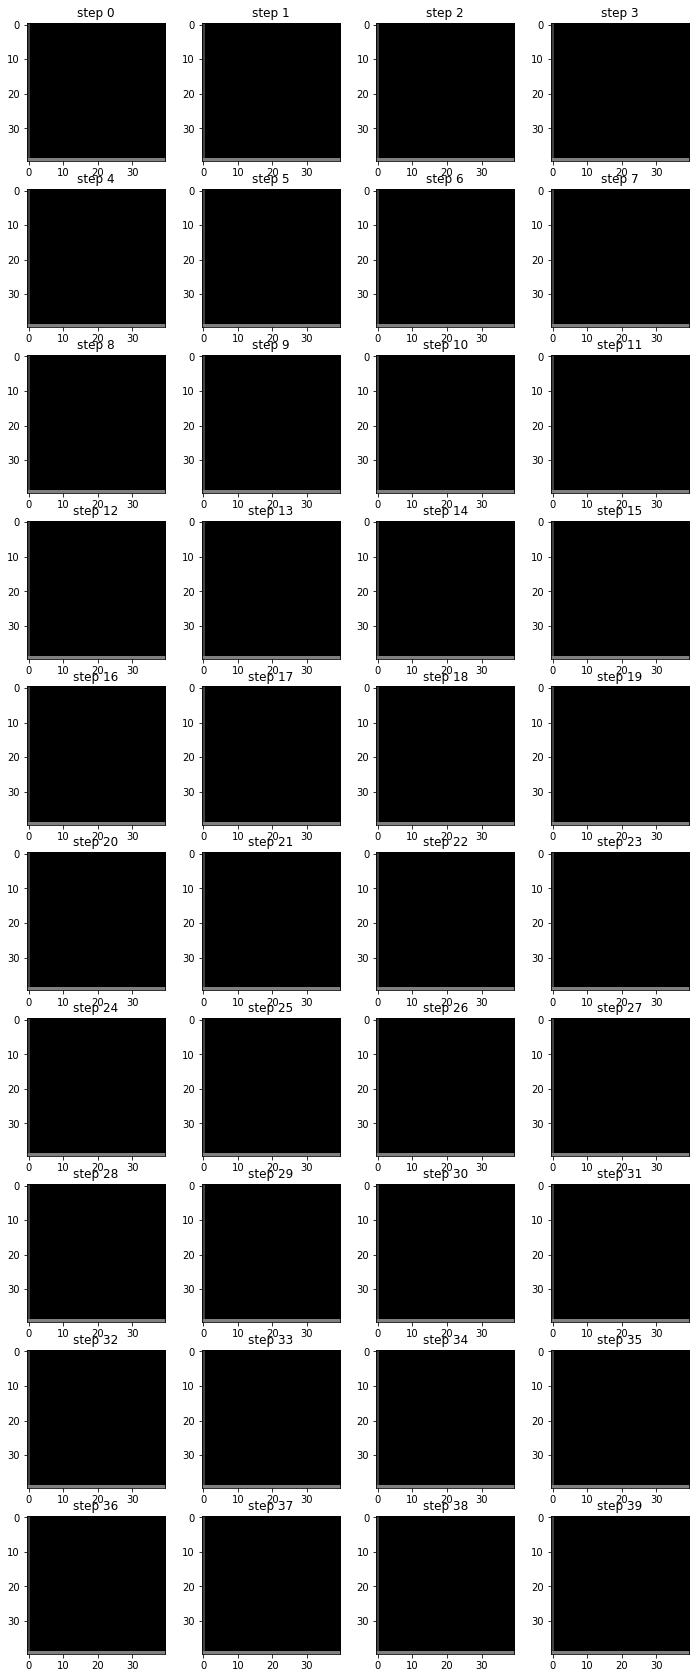

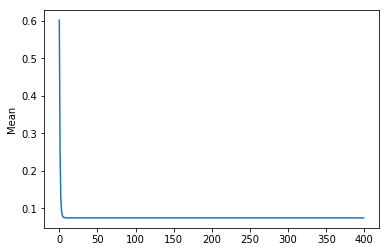

In [165]:
# you can change these values if you like 
n_steps_x = 10
n_steps_y = 4
n_states = 4
n_x = 40
n_y = 40
alpha = 10
prior_name = 'prior_l0'

# TODO: setup lattice to random integers between 0 and n_states with shape (n_x, n_y)
lattice = np.random.randint(0, n_states, size=(n_x, n_y))

mean = np.zeros(n_steps_x * n_steps_y * 10)

f = plt.figure()
f.set_size_inches((n_steps_y*3, n_steps_x*3))
for i in tnrange(n_steps_x*n_steps_y):
    for j in range(10):
        sweep_scanlines_rnd(lattice)
        mean[(i * 10) + j] = lattice.mean()
    ax = f.add_subplot(n_steps_x, n_steps_y, i+1)
    ax.set_title("step "+str(i))
    ax.imshow(lattice, cmap='gray', vmax=n_states)


fig = plt.figure()
plt.plot(mean)
plt.ylabel('Mean')
plt.show()

KeyboardInterrupt: 

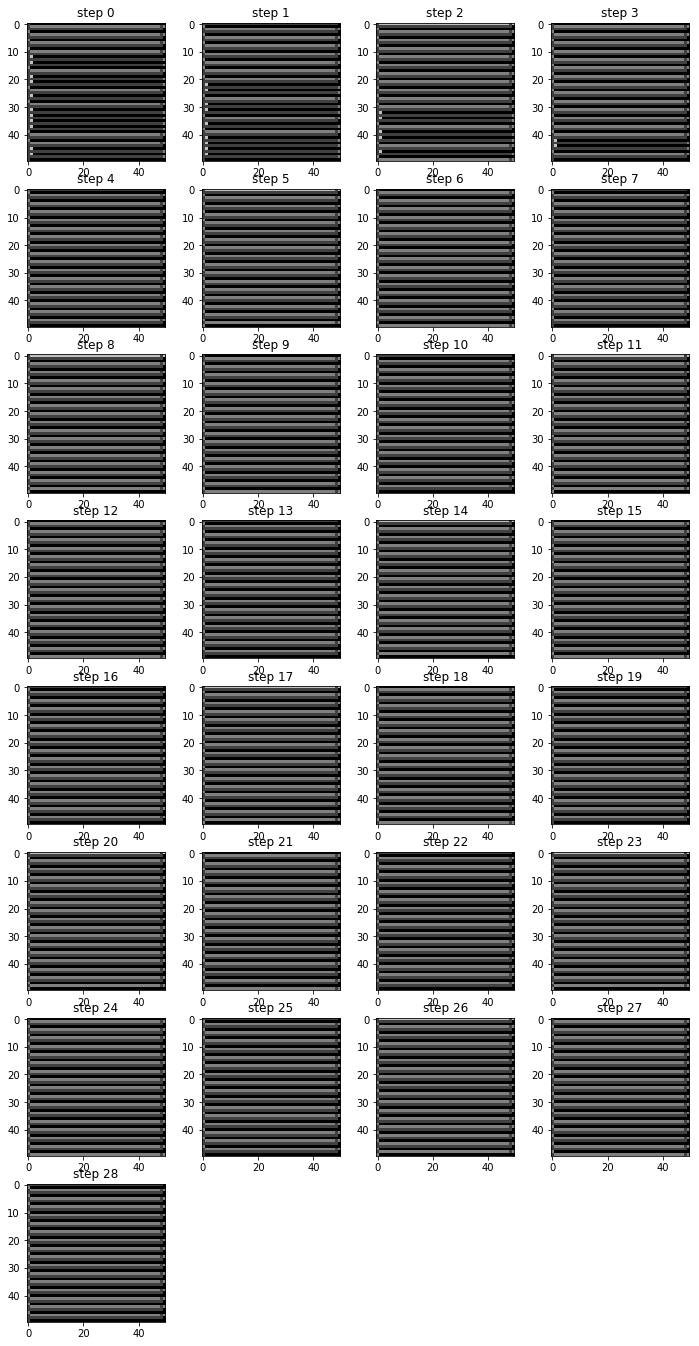

In [187]:
# you can change these values if you like 
n_steps_x = 10
n_steps_y = 4
n_states = 4
n_x = 50
n_y = 50
alpha = 5
prior_name = 'prior_l1'

# TODO: setup lattice to random integers between 0 and n_states with shape (n_x, n_y)
lattice = np.random.randint(0, n_states, size=(n_x, n_y))

f = plt.figure()
f.set_size_inches((n_steps_y*3, n_steps_x*3))
for i in tnrange(n_steps_x*n_steps_y):
    for _ in range(10):
        sweep_scanlines(lattice)
    ax = f.add_subplot(n_steps_x, n_steps_y, i+1)
    ax.set_title("step "+str(i))
    ax.imshow(lattice, cmap='gray', vmax=n_states)

### b) Sampling from the posterior

In [193]:
# TODO load the predictions for the test image in pred
import h5py
def load_predictions(path=''):
    pred = h5py.File('C:\\Users\\Sebastian\\Desktop\\predictions.h5', 'r')
    if pred != None:
        return pred

#### Prior 1)

(496, 768)


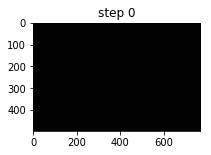

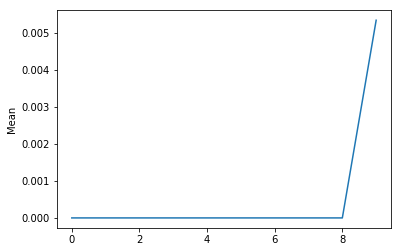

In [185]:
n_steps_x = 4
n_steps_y = 2
n_states = 5
alpha = 2

pred = load_predictions()
keys = list(pred.keys())

test = np.array(pred[keys[0]])
test = test[:, :, 0]
# you can change these values if you like 
n_steps_x = 1
n_steps_y = 1
n_states = 4
n_x = test.shape[1]
n_y = test.shape[0]
alpha = 5
prior_name = 'prior_l0'

print(test.shape)

# TODO: setup lattice to random integers between 0 and n_states with shape (n_x, n_y)
lattice = test
mean = np.zeros(n_steps_x * n_steps_y * 10)

f = plt.figure()
f.set_size_inches((n_steps_y*3, n_steps_x*3))
for i in tnrange(n_steps_x*n_steps_y):
    for _ in range(2):
        sweep_scanlines(lattice)
        mean[(i * 10) + j] = lattice.mean()
    ax = f.add_subplot(n_steps_x, n_steps_y, i+1)
    ax.set_title("step "+str(i))
    ax.imshow(lattice, cmap='gray', vmax=n_states)


fig = plt.figure()
plt.plot(mean)
plt.ylabel('Mean')
plt.show()

In [194]:
'''
Comment:
The solution seems to converge way too fast. We did a lot of debugging but could not find the error. Also we did not know what to
do, when we had multiple, equal maximum propability values in our accumulated PSI-arrays. 
'''

'\nComment:\nThe solution seems to converge way too fast. We did a lot of debugging but could not find the error. Also we did not know what to\ndo, when we had multiple, equal maximum propability values in our accumulated PSI-arrays. \n'

#### Prior 2)

In [4]:
# TODO do the same for prior 2)
n_steps_x = 4
n_steps_y = 2
n_states = 5
alpha = 2

pred = load_predictions()
keys = list(pred.keys())

test = np.array(pred[keys[0]])
test = test[:, :, 0]
# you can change these values if you like 
n_steps_x = 1
n_steps_y = 1
n_states = 4
n_x = test.shape[1]
n_y = test.shape[0]
alpha = 5
prior_name = 'prior_l1'

print(test.shape)

# TODO: setup lattice to random integers between 0 and n_states with shape (n_x, n_y)
lattice = test
mean = np.zeros(n_steps_x * n_steps_y * 10)

f = plt.figure()
f.set_size_inches((n_steps_y*3, n_steps_x*3))
for i in tnrange(n_steps_x*n_steps_y):
    for _ in range(2):
        sweep_scanlines(lattice)
        mean[(i * 10) + j] = lattice.mean()
    ax = f.add_subplot(n_steps_x, n_steps_y, i+1)
    ax.set_title("step "+str(i))
    ax.imshow(lattice, cmap='gray', vmax=n_states)


fig = plt.figure()
plt.plot(mean)
plt.ylabel('Mean')
plt.show()

In [186]:
'''
Comment:
The solution seems to converge way too fast. We did a lot of debugging but could not find the error. Also we did not know what to
do, when we had multiple, equal maximum propability values in our accumulated PSI-arrays. 
'''

'\nComment:\nThe solution seems to converge way too fast. We did a lot of debugging but could not find the error. Also we did not know what to \n'

### $\star$ Gibbs sampling on a chessboard

In [ ]:
# TODO implement the Gibbs sampler to do the updates parallel for all "black fields" and afterwards all "white fields"
# Hints (for one possible solution:
# * convert the class labels into one-hot vectors of length n_states
# * use masks to get all black fields, all white fields and all corresponding neighboring fields (you will have to extend the lattice on each side by a row/column of zero-vectors to avoid edge effects)
# * to compute the class probabilities: first sum over the one-hot vectors of the neighboring nodes. then use matrix multiplication with the prior matrix
# * to sample from multiple probability vectors at the same time you can use a reparametrization trick: sampling from a discrete distribution with probabilities (p_1,...,p_N) is equivalent to sampling (U_1,...,U_N) from a uniform distribution Uni(0,1) and then computeing the state as argmax_i(log(p_i)-log(-log(U_i)))